In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("STUDENT SCORE PREDICTION MODEL")
print("=" * 60)


STUDENT SCORE PREDICTION MODEL


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# 1. LOAD YOUR DATASET
print("1. LOADING DATASET...")

1. LOADING DATASET...


In [12]:
#Familiarize yourself with the content of your downloaded dataset zip file
import zipfile

zip_path = "/content/archive (7).zip"

# List contents
with zipfile.ZipFile(zip_path, 'r') as z:
    print("Files in zip:\n")
    for name in z.namelist():
        print(name)

Files in zip:

StudentPerformanceFactors.csv


In [17]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/std_perf_data.csv")

In [18]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [19]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst few rows:")
print(df.head())


Dataset shape: (6607, 20)
Columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']

First few rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No          

In [20]:
# 2. DATA CLEANING AND EXPLORATION
print("\n2. DATA CLEANING AND EXPLORATION...")



2. DATA CLEANING AND EXPLORATION...


In [22]:
# Check for missing values
print(f"\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing values per column:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


In [23]:
# Handle missing values if any
if df.isnull().sum().sum() > 0:
    print("Handling missing values...")
    # For numerical columns, fill with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

    # For categorical columns, fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

    print("Missing values handled!")
else:
    print("No missing values found!")

Handling missing values...
Missing values handled!


In [25]:
print(f"\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 

In [26]:
# Target variable analysis ('Exam_Score' is the target)
target_column = 'Exam_Score'
if target_column in df.columns:
    print(f"\n{target_column} Statistics:")
    print(df[target_column].describe())
else:
    print("Target column 'Exam_Score' not found. Please check column names.")
    print("Available columns:", df.columns.tolist())


Exam_Score Statistics:
count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64


In [27]:
# 3. DATA VISUALIZATION
print("\n3. CREATING VISUALIZATIONS...")



3. CREATING VISUALIZATIONS...


In [28]:
# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_columns}")
print(f"Categorical columns: {categorical_columns}")

Numerical columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
Categorical columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [29]:
# Remove target from features for visualization
if target_column in numerical_columns:
    numerical_features = [col for col in numerical_columns if col != target_column]
else:
    numerical_features = numerical_columns




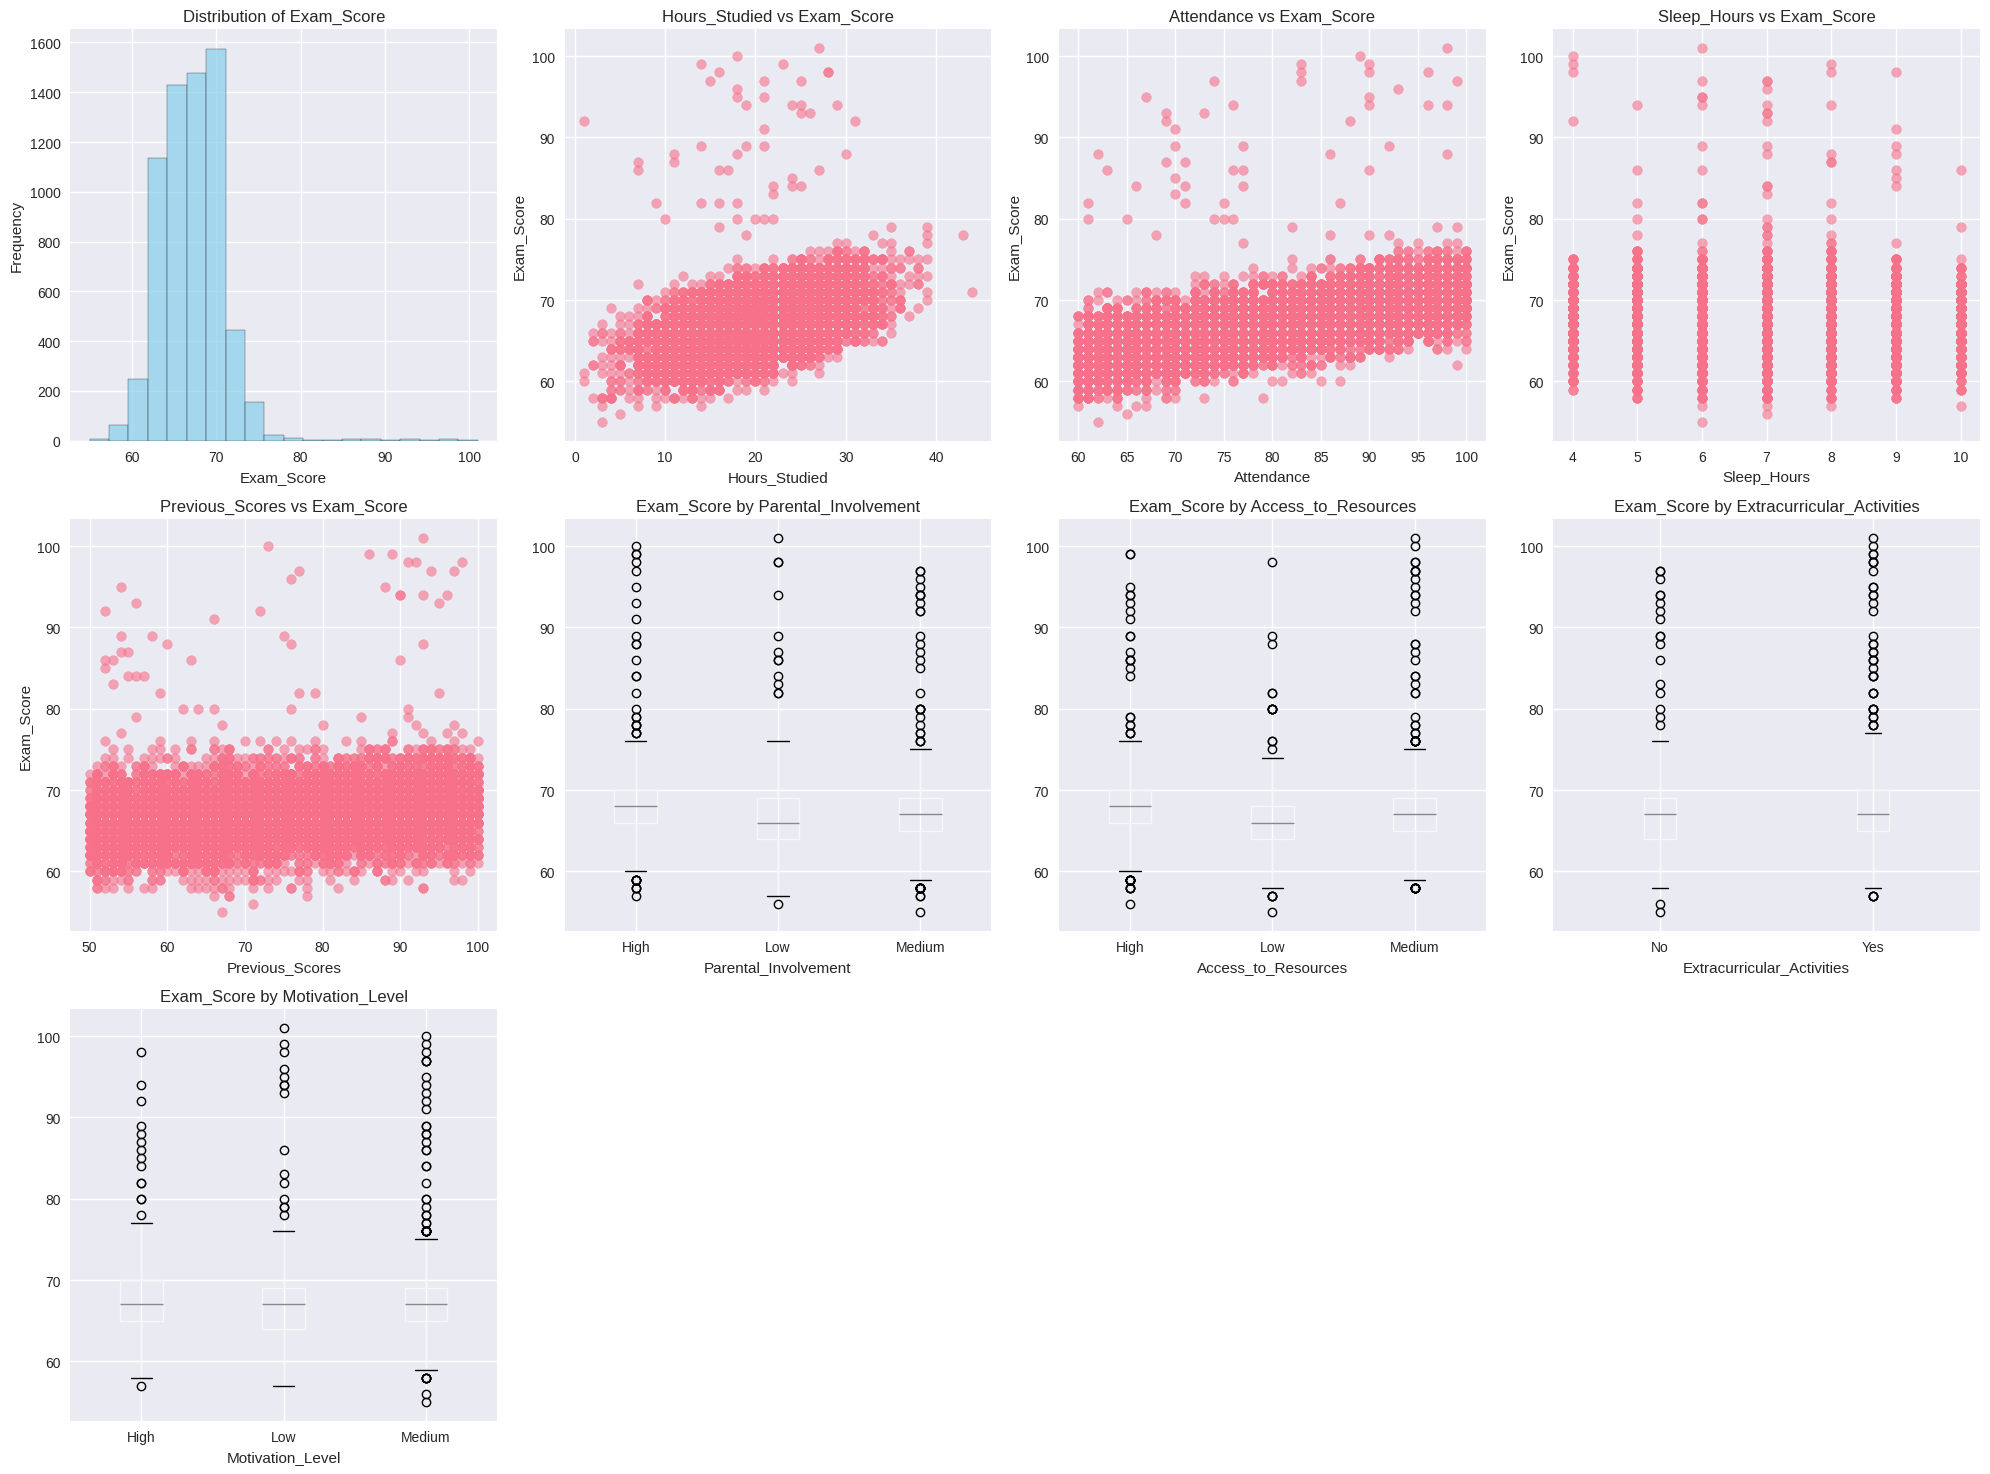

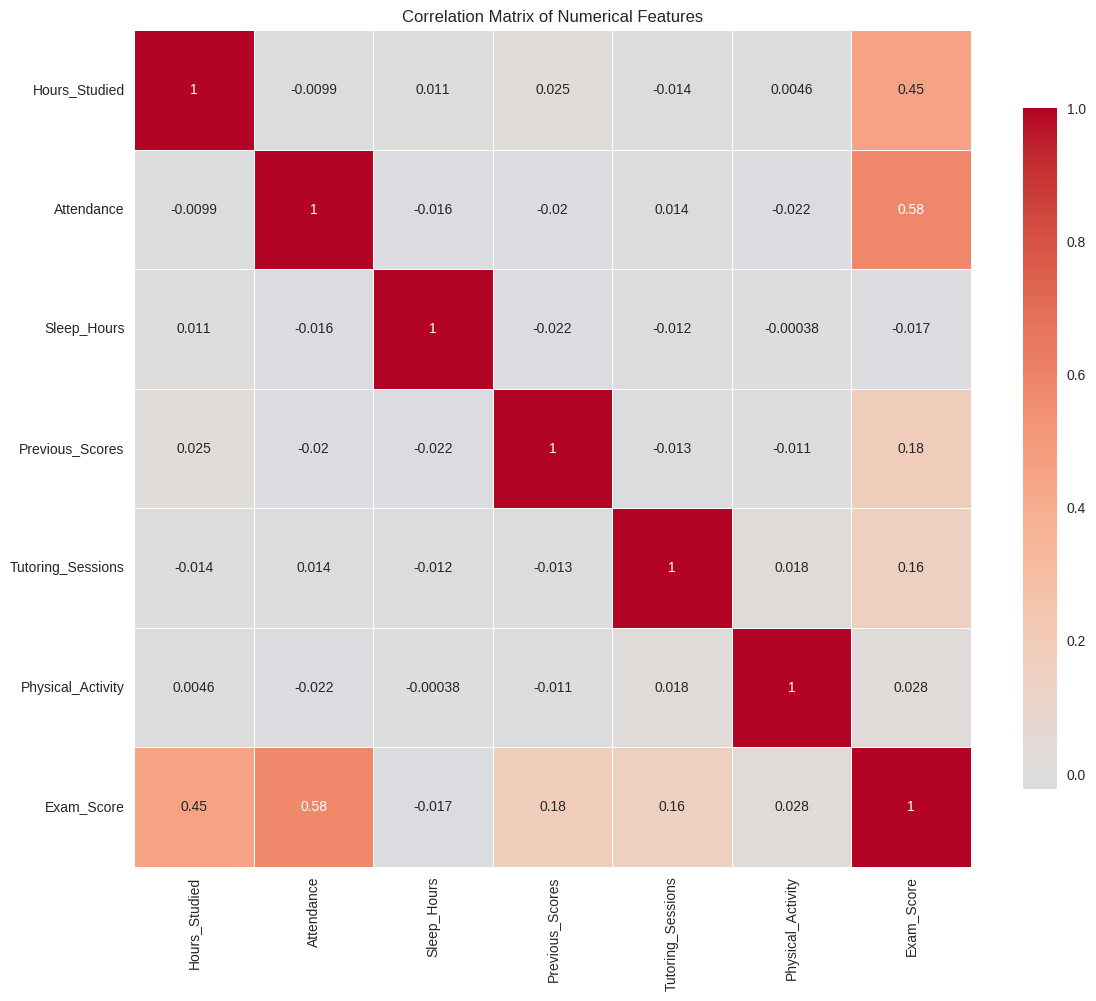

In [30]:
# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Target variable distribution
plt.subplot(3, 4, 1)
plt.hist(df[target_column], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {target_column}')
plt.xlabel(target_column)
plt.ylabel('Frequency')

# 2-5. Top numerical features vs target
plot_idx = 2
for i, col in enumerate(numerical_features[:4]):
    plt.subplot(3, 4, plot_idx)
    plt.scatter(df[col], df[target_column], alpha=0.6)
    plt.title(f'{col} vs {target_column}')
    plt.xlabel(col)
    plt.ylabel(target_column)
    plot_idx += 1

# 6-9. Categorical features boxplots
for i, col in enumerate(categorical_columns[:4]):
    if plot_idx <= 12:
        plt.subplot(3, 4, plot_idx)
        df.boxplot(column=target_column, by=col, ax=plt.gca())
        plt.title(f'{target_column} by {col}')
        plt.suptitle('')
        plot_idx += 1

plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
if len(numerical_columns) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()


In [31]:
# 4. DATA PREPROCESSING
print("\n4. DATA PREPROCESSING...")


4. DATA PREPROCESSING...


In [32]:
# Create a copy for processing
df_processed = df.copy()

# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    if col != target_column:  # Don't encode target if it's categorical
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le

print("Categorical variables encoded successfully!")
print(f"Processed dataset shape: {df_processed.shape}")


Categorical variables encoded successfully!
Processed dataset shape: (6607, 20)


In [33]:
# 5. TRAIN-TEST SPLIT
print("\n5. SPLITTING DATA...")

# Prepare features and target
X = df_processed.drop(target_column, axis=1)
y = df_processed[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")


5. SPLITTING DATA...
Training set size: 5285 samples
Testing set size: 1322 samples
Number of features: 19


In [34]:
# 6. LINEAR REGRESSION MODEL
print("\n6. TRAINING LINEAR REGRESSION MODEL...")



6. TRAINING LINEAR REGRESSION MODEL...


In [35]:
# Train linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("LINEAR REGRESSION RESULTS:")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"Root Mean Squared Error: {rmse_lr:.2f}")
print(f"Mean Absolute Error: {mae_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\nTop 10 Most Important Features:")
print(feature_importance.head(10))

LINEAR REGRESSION RESULTS:
Mean Squared Error: 4.40
Root Mean Squared Error: 2.10
Mean Absolute Error: 1.02
R² Score: 0.6888

Top 10 Most Important Features:
                       Feature  Coefficient  Abs_Coefficient
8              Internet_Access     0.967763         0.967763
15       Learning_Disabilities    -0.874608         0.874608
4   Extracurricular_Activities     0.569081         0.569081
13              Peer_Influence     0.532565         0.532565
9            Tutoring_Sessions     0.502380         0.502380
17          Distance_from_Home     0.467132         0.467132
2         Parental_Involvement    -0.446969         0.446969
3          Access_to_Resources    -0.404436         0.404436
0                Hours_Studied     0.288626         0.288626
11             Teacher_Quality    -0.237587         0.237587


In [36]:
# 7. POLYNOMIAL REGRESSION
print("\n7. TRAINING POLYNOMIAL REGRESSION MODELS...")


7. TRAINING POLYNOMIAL REGRESSION MODELS...


In [37]:
# Try different polynomial degrees
poly_results = {}
degrees = [2, 3]  # Start with lower degrees to avoid overfitting

for degree in degrees:
    print(f"\nTraining Polynomial Regression with degree {degree}...")

    # Create polynomial features pipeline
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())
    ])

    try:
        # Fit the model
        poly_model.fit(X_train, y_train)

        # Make predictions
        y_pred_poly = poly_model.predict(X_test)

        # Calculate metrics
        mse_poly = mean_squared_error(y_test, y_pred_poly)
        rmse_poly = np.sqrt(mse_poly)
        mae_poly = mean_absolute_error(y_test, y_pred_poly)
        r2_poly = r2_score(y_test, y_pred_poly)

        poly_results[degree] = {
            'model': poly_model,
            'predictions': y_pred_poly,
            'mse': mse_poly,
            'rmse': rmse_poly,
            'mae': mae_poly,
            'r2': r2_poly
        }

        print(f"Degree {degree} - MSE: {mse_poly:.2f}, RMSE: {rmse_poly:.2f}, MAE: {mae_poly:.2f}, R²: {r2_poly:.4f}")

    except Exception as e:
        print(f"Error with degree {degree}: {str(e)}")
        continue


Training Polynomial Regression with degree 2...
Degree 2 - MSE: 3.42, RMSE: 1.85, MAE: 0.56, R²: 0.7581

Training Polynomial Regression with degree 3...
Degree 3 - MSE: 5.47, RMSE: 2.34, MAE: 1.21, R²: 0.6128


In [38]:
# 8. FEATURE COMBINATION EXPERIMENTS
print("\n8. EXPERIMENTING WITH DIFFERENT FEATURE COMBINATIONS...")



8. EXPERIMENTING WITH DIFFERENT FEATURE COMBINATIONS...


In [39]:
# Define feature combinations based on your dataset
feature_combinations = {}

# Basic study-related features
basic_study_features = []
for col in X.columns:
    if any(keyword in col.lower() for keyword in ['hour', 'study', 'attendance', 'previous']):
        basic_study_features.append(col)

if basic_study_features:
    feature_combinations['Study Features'] = basic_study_features

# Support and resource features
support_features = []
for col in X.columns:
    if any(keyword in col.lower() for keyword in ['parent', 'tutor', 'teacher', 'resource', 'income']):
        support_features.append(col)

if support_features:
    feature_combinations['Support Features'] = support_features

# Personal and lifestyle features
personal_features = []
for col in X.columns:
    if any(keyword in col.lower() for keyword in ['sleep', 'physical', 'motivation', 'activity']):
        personal_features.append(col)

if personal_features:
    feature_combinations['Personal Features'] = personal_features

# Top correlated features (if correlation data available)
if len(numerical_columns) > 1:
    target_correlations = df[numerical_columns].corr()[target_column].abs().sort_values(ascending=False)
    top_corr_features = target_correlations.head(6).index.tolist()
    if target_column in top_corr_features:
        top_corr_features.remove(target_column)
    if top_corr_features:
        feature_combinations['Top Correlated'] = top_corr_features

# All features
feature_combinations['All Features'] = list(X.columns)

# Test each combination
combination_results = {}

for combo_name, features in feature_combinations.items():
    if not features:  # Skip empty feature lists
        continue

    print(f"\nTesting {combo_name} ({len(features)} features)...")

    try:
        # Select features
        X_train_combo = X_train[features]
        X_test_combo = X_test[features]

        # Train model
        model_combo = LinearRegression()
        model_combo.fit(X_train_combo, y_train)

        # Make predictions
        y_pred_combo = model_combo.predict(X_test_combo)

        # Calculate metrics
        mse_combo = mean_squared_error(y_test, y_pred_combo)
        rmse_combo = np.sqrt(mse_combo)
        mae_combo = mean_absolute_error(y_test, y_pred_combo)
        r2_combo = r2_score(y_test, y_pred_combo)

        combination_results[combo_name] = {
            'features': features,
            'n_features': len(features),
            'mse': mse_combo,
            'rmse': rmse_combo,
            'mae': mae_combo,
            'r2': r2_combo
        }

        print(f"MSE: {mse_combo:.2f}, RMSE: {rmse_combo:.2f}, MAE: {mae_combo:.2f}, R²: {r2_combo:.4f}")

    except Exception as e:
        print(f"Error with {combo_name}: {str(e)}")
        continue



Testing Study Features (4 features)...
MSE: 5.35, RMSE: 2.31, MAE: 1.36, R²: 0.6218

Testing Support Features (6 features)...
MSE: 13.64, RMSE: 3.69, MAE: 2.75, R²: 0.0349

Testing Personal Features (3 features)...
MSE: 14.18, RMSE: 3.77, MAE: 2.83, R²: -0.0031

Testing Top Correlated (5 features)...
MSE: 5.06, RMSE: 2.25, MAE: 1.26, R²: 0.6422

Testing All Features (19 features)...
MSE: 4.40, RMSE: 2.10, MAE: 1.02, R²: 0.6888


In [40]:
# 9. MODEL COMPARISON AND VISUALIZATION
print("\n9. MODEL COMPARISON AND FINAL VISUALIZATIONS...")


9. MODEL COMPARISON AND FINAL VISUALIZATIONS...


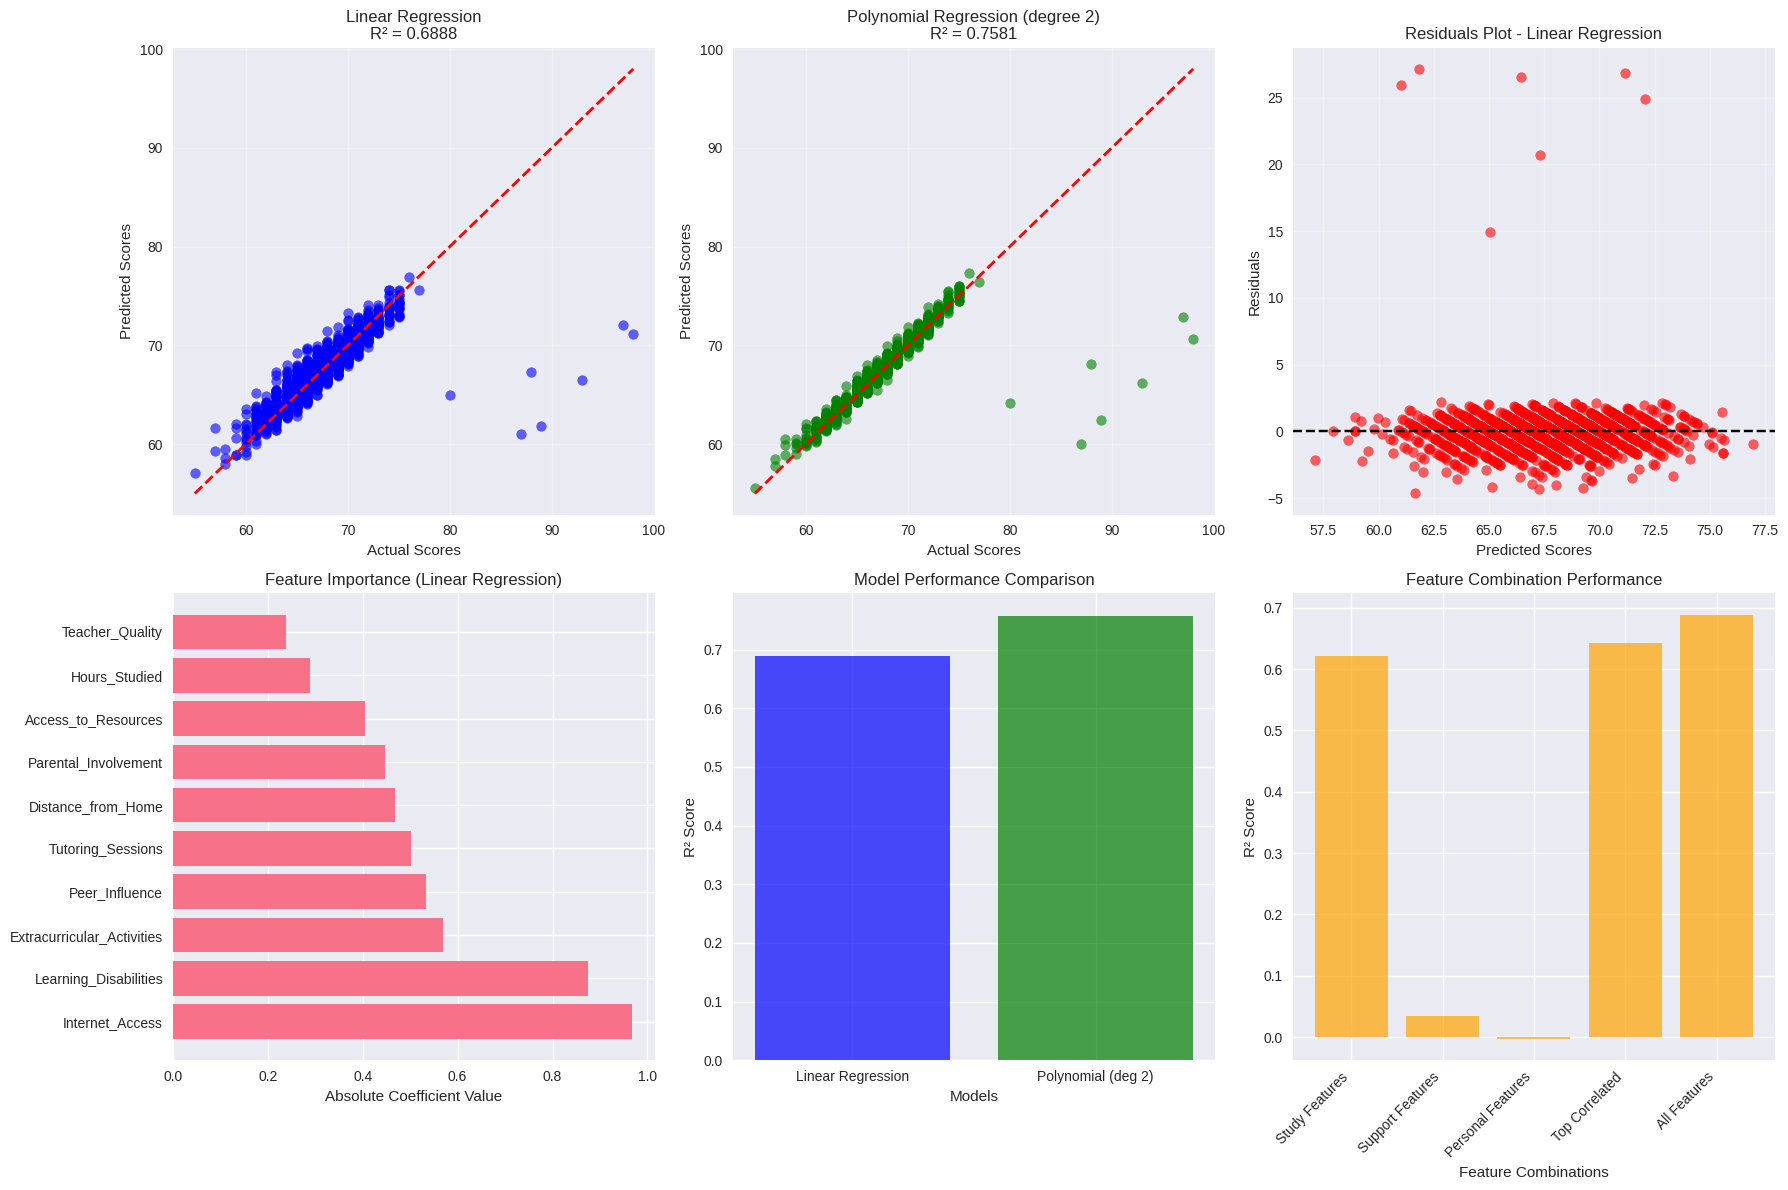

In [41]:
# Create comparison plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Linear Regression: Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Scores')
axes[0, 0].set_ylabel('Predicted Scores')
axes[0, 0].set_title(f'Linear Regression\nR² = {r2_lr:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# Best Polynomial Regression (if available)
if poly_results:
    best_poly_degree = max(poly_results.keys(), key=lambda x: poly_results[x]['r2'])
    best_poly_pred = poly_results[best_poly_degree]['predictions']
    best_poly_r2 = poly_results[best_poly_degree]['r2']

    axes[0, 1].scatter(y_test, best_poly_pred, alpha=0.6, color='green')
    axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0, 1].set_xlabel('Actual Scores')
    axes[0, 1].set_ylabel('Predicted Scores')
    axes[0, 1].set_title(f'Polynomial Regression (degree {best_poly_degree})\nR² = {best_poly_r2:.4f}')
    axes[0, 1].grid(True, alpha=0.3)
else:
    axes[0, 1].text(0.5, 0.5, 'Polynomial Regression\nNot Available',
                    ha='center', va='center', transform=axes[0, 1].transAxes)

# Residuals plot for Linear Regression
residuals_lr = y_test - y_pred_lr
axes[0, 2].scatter(y_pred_lr, residuals_lr, alpha=0.6, color='red')
axes[0, 2].axhline(y=0, color='black', linestyle='--')
axes[0, 2].set_xlabel('Predicted Scores')
axes[0, 2].set_ylabel('Residuals')
axes[0, 2].set_title('Residuals Plot - Linear Regression')
axes[0, 2].grid(True, alpha=0.3)

# Feature Importance Bar Plot
top_features = feature_importance.head(min(10, len(feature_importance)))
y_pos = np.arange(len(top_features))
axes[1, 0].barh(y_pos, top_features['Abs_Coefficient'])
axes[1, 0].set_yticks(y_pos)
axes[1, 0].set_yticklabels(top_features['Feature'])
axes[1, 0].set_xlabel('Absolute Coefficient Value')
axes[1, 0].set_title('Feature Importance (Linear Regression)')

# Model Performance Comparison
models_list = ['Linear Regression']
r2_list = [r2_lr]

if poly_results:
    models_list.append(f'Polynomial (deg {best_poly_degree})')
    r2_list.append(best_poly_r2)

x_pos = np.arange(len(models_list))
axes[1, 1].bar(x_pos, r2_list, color=['blue', 'green'][:len(r2_list)], alpha=0.7)
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_title('Model Performance Comparison')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(models_list)

# Feature Combination Comparison
if combination_results:
    combo_names = list(combination_results.keys())
    combo_r2_scores = [combination_results[name]['r2'] for name in combo_names]

    axes[1, 2].bar(range(len(combo_names)), combo_r2_scores, color='orange', alpha=0.7)
    axes[1, 2].set_xlabel('Feature Combinations')
    axes[1, 2].set_ylabel('R² Score')
    axes[1, 2].set_title('Feature Combination Performance')
    axes[1, 2].set_xticks(range(len(combo_names)))
    axes[1, 2].set_xticklabels(combo_names, rotation=45, ha='right')
else:
    axes[1, 2].text(0.5, 0.5, 'Feature Combinations\nNot Available',
                    ha='center', va='center', transform=axes[1, 2].transAxes)

plt.tight_layout()
plt.show()


In [42]:
# 10. FINAL SUMMARY
print("\n" + "="*60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)

print(f"\n1. LINEAR REGRESSION:")
print(f"   R² Score: {r2_lr:.4f}")
print(f"   RMSE: {rmse_lr:.2f}")
print(f"   MAE: {mae_lr:.2f}")

if poly_results:
    best_poly_degree = max(poly_results.keys(), key=lambda x: poly_results[x]['r2'])
    print(f"\n2. BEST POLYNOMIAL REGRESSION (Degree {best_poly_degree}):")
    print(f"   R² Score: {poly_results[best_poly_degree]['r2']:.4f}")
    print(f"   RMSE: {poly_results[best_poly_degree]['rmse']:.2f}")
    print(f"   MAE: {poly_results[best_poly_degree]['mae']:.2f}")

if combination_results:
    best_combo = max(combination_results.keys(), key=lambda x: combination_results[x]['r2'])
    print(f"\n3. BEST FEATURE COMBINATION:")
    print(f"   Combination: {best_combo}")
    print(f"   Features Used: {len(combination_results[best_combo]['features'])}")
    print(f"   R² Score: {combination_results[best_combo]['r2']:.4f}")
    print(f"   RMSE: {combination_results[best_combo]['rmse']:.2f}")

print(f"\n4. TOP 5 MOST IMPORTANT FEATURES:")
for i, (_, row) in enumerate(feature_importance.head(5).iterrows(), 1):
    print(f"   {i}. {row['Feature']}: {row['Coefficient']:.3f}")

print(f"\nAnalysis complete! All models have been trained and evaluated.")

# Optional: Function to make predictions on new data
def predict_score(model, new_data, encoders=None):
    """
    Function to predict scores for new student data

    Parameters:
    model: trained model
    new_data: pandas DataFrame with same features as training data
    encoders: dictionary of label encoders for categorical variables
    """
    if encoders:
        new_data_processed = new_data.copy()
        for col, encoder in encoders.items():
            if col in new_data_processed.columns:
                new_data_processed[col] = encoder.transform(new_data_processed[col].astype(str))
        return model.predict(new_data_processed)
    else:
        return model.predict(new_data)

print(f"\nUse the predict_score() function to make predictions on new data!")
print(f"Example: predictions = predict_score(lr_model, new_student_data, label_encoders)")


FINAL MODEL PERFORMANCE SUMMARY

1. LINEAR REGRESSION:
   R² Score: 0.6888
   RMSE: 2.10
   MAE: 1.02

2. BEST POLYNOMIAL REGRESSION (Degree 2):
   R² Score: 0.7581
   RMSE: 1.85
   MAE: 0.56

3. BEST FEATURE COMBINATION:
   Combination: All Features
   Features Used: 19
   R² Score: 0.6888
   RMSE: 2.10

4. TOP 5 MOST IMPORTANT FEATURES:
   1. Internet_Access: 0.968
   2. Learning_Disabilities: -0.875
   3. Extracurricular_Activities: 0.569
   4. Peer_Influence: 0.533
   5. Tutoring_Sessions: 0.502

Analysis complete! All models have been trained and evaluated.

Use the predict_score() function to make predictions on new data!
Example: predictions = predict_score(lr_model, new_student_data, label_encoders)
